<a href="https://colab.research.google.com/github/CRPeace/Dojo-food_items_assignment/blob/main/C_Peace_BigMart_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Mart Sales Prediction Machine Learning
Cameron Peace


### Assignment Checklist
* [x] Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
* [x] Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
* [x] Perform a train test split
* [x] Create a preprocessing object to prepare the dataset for Machine Learning
* [x] Make sure your imputation of missing values occurs after the train test split using SimpleImputer.


### Data Dictionary

The dataset used in this analysis was originally provided by [Analytics Vidhya](https://datahack.analyticsvidhya.com/) for use in a data analysis [practice competition](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#About).  It includes data on products from the grocery store chain [Big Mart](https://www.bigmart.ae/index.html), which has locations mostly in India and the United Arab Emirates. From [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/): **"The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities."*

* Variable Name: --	Description
* Item_Identifier: --	Unique product ID
* Item_Weight: --	Weight of product
* Item_Fat_Content: --	Whether the product is low fat or regular
* Item_Visibility: --	The percentage of total display area of all products in a store allocated to the particular product
* Item_Type: --	The category to which the product belongs
* Item_MRP: --	Maximum Retail Price (list price) of the product
* Outlet_Identifier: --	Unique store ID
* Outlet_Establishment_Year: --	The year in which store was established
* Outlet_Size: --	The size of the store in terms of ground area covered
* Outlet_Location_Type: --	The type of area in which the store is located
* Outlet_Type: --	Whether the outlet is a grocery store or some sort of supermarket
* Item_Outlet_Sales: --	Sales of the product in the particular store. This is the target variable to be predicted.

### Imports, Loading & Viewing the Data

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
df = pd.read_csv('/content/sales_predictions.csv')
df_original = df.copy()

In [34]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3104,NCN53,5.175,Low Fat,0.050809,Health and Hygiene,33.6874,OUT010,1998,NaN,Tier 3,Grocery Store,70.5748
8086,NCN42,NaN,Low Fat,0.014154,Household,145.6418,OUT027,1985,Medium,Tier 3,Supermarket Type3,3825.6868
2492,DRK35,NaN,Low Fat,0.071499,Hard Drinks,37.7506,OUT027,1985,Medium,Tier 3,Supermarket Type3,796.9626
8140,DRH25,18.700,Low Fat,0.014581,Soft Drinks,50.2324,OUT013,1987,High,Tier 3,Supermarket Type1,623.1888
3301,FDX38,10.500,Regular,0.080689,Dairy,46.7376,OUT010,1998,NaN,Tier 3,Grocery Store,47.9376


In [35]:
display(df.info(), df.describe().T, df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Data Cleaning

In [36]:
# Fixing column names to preference
df = df.rename(columns = lambda x: x.lower())
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [37]:
# Checking for duplicates
df.duplicated().sum()

0

In [38]:
# Checking for missing values
df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

### Checking and Cleaning Categorical Data

In [39]:
# Checking for problems in categorical data
for i in df.columns:
  if df[i].dtype == 'object' or df[i].nunique() <= 10:
    print(i.upper(), '\n********\n', df[i].unique(), '\n----->', 
          str(df[i].dtype).upper(), '\n********\n')

ITEM_IDENTIFIER 
********
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 
-----> OBJECT 
********

ITEM_FAT_CONTENT 
********
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 
-----> OBJECT 
********

ITEM_TYPE 
********
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 
-----> OBJECT 
********

OUTLET_IDENTIFIER 
********
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 
-----> OBJECT 
********

OUTLET_ESTABLISHMENT_YEAR 
********
 [1999 2009 1998 1987 1985 2002 2007 1997 2004] 
-----> INT64 
********

OUTLET_SIZE 
********
 ['Medium' nan 'High' 'Small'] 
-----> OBJECT 
********

OUTLET_LOCATION_TYPE 
********
 ['Tier 1' 'Tier 3' 'Tier 2'] 
-----> OBJECT 
********

OUTLET_TYPE 
********
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 
-----> OB

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Looks like there are some redundant values in the 'Item Fat Content' Column that needs to be fixed.  There are also some missing values in the 'Outlet Size' column.
</i></font>

In [40]:
df['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [41]:
# Fixing 'Low Fat' column
df['item_fat_content'] = df['item_fat_content'].apply(lambda x: 'Low Fat' if x in ['low fat', 'LF'] 
                                                      else 'Regular' if x == 'reg' else x)

# Fixing 'Outlet Size' column
df['outlet_size'] = df['outlet_size'].fillna('missing')

# Checking to make sure the changes took effect
display(df['item_fat_content'].unique(), df['outlet_size'].unique())

array(['Low Fat', 'Regular'], dtype=object)

array(['Medium', 'missing', 'High', 'Small'], dtype=object)

In [42]:
# checking for missing values
df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                     0
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
There are 1463 missing values, these will be imputed during preprocessing
</i></font>

### Checking and Fixing Numerical Values

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
item_visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
item_mrp,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
outlet_establishment_year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
item_outlet_sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


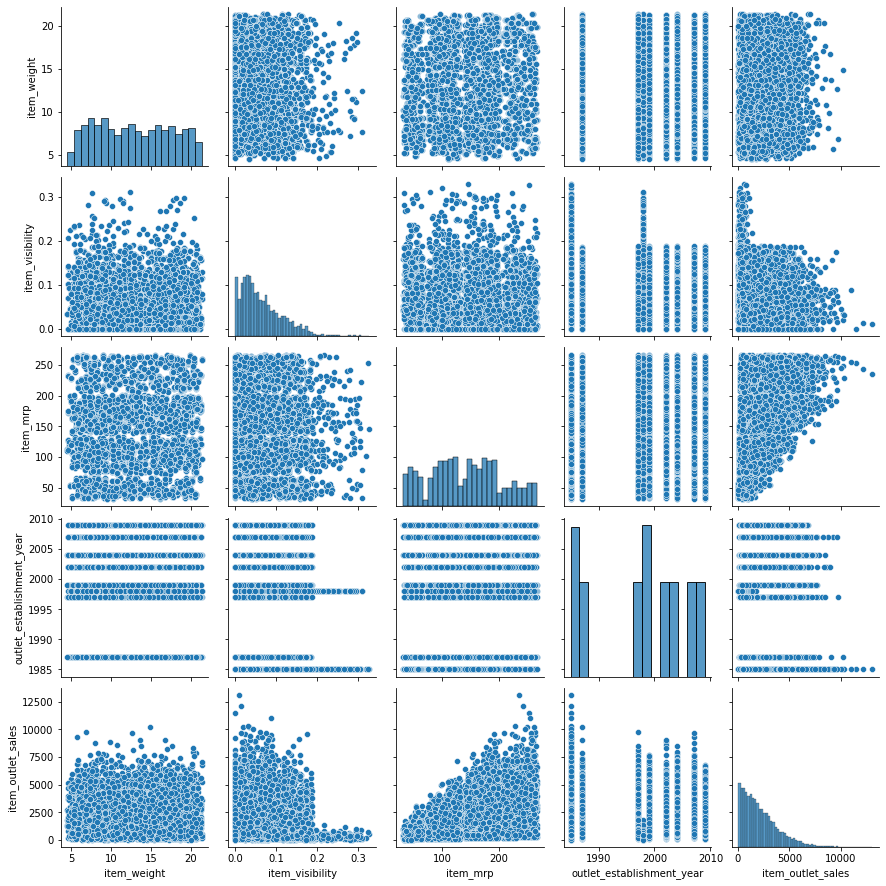

In [57]:
# Visualizing numeric columns in case some pattern jumps out
sns.pairplot(df);

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
* 'item weight' is missing values that will be imputed
* 'item visibility' contains some 0 values, there could be an argument to be made that these represent NaNs, since it is very unlikely the item was kept in a back storeroom (i.e. every item should have ***some*** visibility).  However, I feel this is a question for a subject matter expert, for now I will interpret the zero values as 'not part of a featured item display' and leave them in.
</i></font>

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: item_weight, dtype: float64

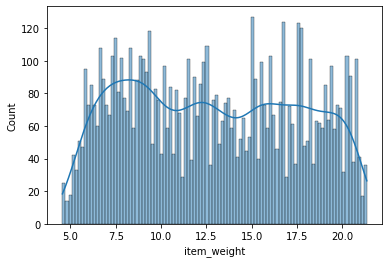

In [64]:
# inspecting item_weights for proper imputation strategy
sns.histplot(df['item_weight'], kde=True, bins=100)

df['item_weight'].describe()

<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Because the values for 'item weight' seem to be slightly skewed, I think imputing missing values with 'median' seems to be the better choice, although both the mean and median are very close. mean = 12.86 ; median = 12.6
</i></font>

### Preparing Data for Machine Learning

In [45]:
# splitting data into X (features), and y (target)
X = df.drop(columns='item_outlet_sales').copy()
y = df['item_outlet_sales'].copy()

In [46]:
# splitting into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
# checking all subsets
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6392, 11)

(2131, 11)

(6392,)

(2131,)

In [48]:
# creating column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [49]:
# instantiating imputers, scalers and ohe
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [50]:
# making pipelines
cat_pipeline = make_pipeline(ohe)
num_pipeline = make_pipeline(median_imputer, scaler)

In [51]:
# instantiating column transformers
cat_tuple = (cat_pipeline, cat_selector)
num_tuple = (num_pipeline, num_selector)

preprocessor = make_column_transformer(cat_tuple, num_tuple)

In [52]:
# fitting column transformer and processing X_train, X_test
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [66]:
# viewing transformed data
display(X_train_processed[:5], X_test_processed[:5])

array([[ 0.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  0.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       [ 0.        ,  0.        ,  0.        , ..., -1.00493112,
        -0.95259072,  0.73201809],
       [ 0.        ,  0.        ,  0.        , ..., -0.96548425,
        -0.33646004,  0.49368575]])

array([[ 0.        ,  0.        ,  0.        , ..., -0.77664625,
        -0.99881554, -1.29380678],
       [ 0.        ,  0.        ,  0.        , ...,  0.1003166 ,
        -1.58519423, -0.10214509],
       [ 0.        ,  0.        ,  0.        , ..., -0.48299432,
        -1.59578435,  0.13618724],
       [ 0.        ,  0.        ,  0.        , ..., -0.41543979,
         0.50659187, -1.53213912],
       [ 0.        ,  0.        ,  0.        , ..., -1.04742559,
         0.886725  ,  0.73201809]])

In [54]:
# doubling checking data
print('Train Shape: ', X_train_processed.shape, 'Missing Values in train: ', np.isnan(X_train_processed).sum())
print('Test Shape: ', X_test_processed.shape, 'Missing Values in test: ', np.isnan(X_test_processed).sum())
print('\n')
print('All Data in train are: ', X_train_processed.dtype)
print('All Data in test are: ', X_test_processed.dtype)

Train Shape:  (6392, 1593) Missing Values in train:  0
Test Shape:  (2131, 1593) Missing Values in test:  0


All Data in train are:  float64
All Data in test are:  float64


In [55]:
# setting processed arrays to dfs for viewing
df_X_train_pro = pd.DataFrame(X_train_processed)
df_X_test_pro = pd.DataFrame(X_test_processed)

In [65]:
# viewing the dataframes of the processed data
display(df_X_train_pro.head(), df_X_test_pro.head())
display(df_X_train_pro.shape, df_X_test_pro.shape)
display(df_X_train_pro.describe().round(2), df_X_test_pro.describe().round(2))


,0,1,2,3,4,5,6,7,8,9,...,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.827485,-0.712775,1.828109,1.327849
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.566644,-1.291052,0.603369,1.327849
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.121028,1.813319,0.244541,0.136187
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.158464,-1.004931,-0.952591,0.732018
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.538870,-0.965484,-0.336460,0.493686


,0,1,2,3,4,5,6,7,8,9,...,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.341372,-0.776646,-0.998816,-1.293807
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.169135,0.100317,-1.585194,-0.102145
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.388798,-0.482994,-1.595784,0.136187
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.049889,-0.415440,0.506592,-1.532139
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.632039,-1.047426,0.886725,0.732018


(6392, 1593)

(2131, 1593)

,0,1,2,3,4,5,6,7,8,9,...,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.33,0.40,0.12,0.65,0.11,0.11,-0.00,-0.00,0.00,-0.00
std,0.03,0.03,0.03,0.02,0.03,0.02,0.03,0.02,0.03,0.03,...,0.47,0.49,0.33,0.48,0.31,0.32,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-1.97,-1.29,-1.77,-1.53
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.76,-0.76,-1.29
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,-0.05,-0.23,0.03,0.14
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,1.00,0.00,0.00,0.77,0.56,0.72,0.73
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,2.01,5.13,1.99,1.33


,0,1,2,3,4,5,6,7,8,9,...,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592
count,2131.00,2131.00,2131.00,2131.0,2131.0,2131.00,2131.00,2131.00,2131.00,2131.0,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.00,2131.00,2131.00,2131.00
mean,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.32,0.38,0.13,0.66,0.11,0.1,-0.04,0.01,-0.06,-0.01
std,0.03,0.03,0.03,0.0,0.0,0.03,0.02,0.04,0.03,0.0,...,0.47,0.49,0.34,0.47,0.31,0.3,1.01,1.04,0.98,0.99
min,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,-1.96,-1.29,-1.75,-1.53
25%,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,-0.88,-0.76,-0.78,-1.29
50%,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,1.00,0.00,0.0,-0.05,-0.24,-0.15,0.14
75%,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,...,1.00,1.00,0.00,1.00,0.00,0.0,0.74,0.56,0.64,0.73
max,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,0.0,...,1.00,1.00,1.00,1.00,1.00,1.0,2.01,4.79,1.99,1.33


<u>Comment:</u> <br>
<font color='dodgerblue'> <i>
Looks like everything worked here.  There are many many dummy columns here due to the amount of unique values in the item_id column.  Also, one of the numeric columns has a maximum value of 5 stds which in reflected in the outliers present in our 'item outlet sales' category.
</i></font>